# Predict Robbery using Tourism and Female industrial sector workers

It was interesting that tourism has a linear relation to crimes Robbery category and females employment in industrical sector too has relation to the same crime. Hence we could be able predict crimes expected for a given district if we have these 2 dependent parameters. Even though this analysis is not predict in a time series, this results can use to predict future values if we have future values for dependent variables (tourism and female employment) in a given random district.

**Imports and workspace setting**

In [35]:
import csv
import math
import os

import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stat

from sklearn import linear_model
from pandas import DataFrame 
from sklearn.model_selection import KFold

import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
integrated_data = pd.read_csv('../data/integrated_data.csv')
integrated_data = integrated_data.drop(integrated_data.columns[[0,3,4,5,6,7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]], axis=1)
print("Data set size : ", integrated_data.shape)
integrated_data.head()

Data set size :  (26, 16)


,District,Rooms,Female emp. Industry,Robbery,Unnatural Offence/Grve Sexual Abuse,Extortion,"Cheating/Misappropriation C.B. Trust > Rs.100,000",Theft of Property (praedial produce > Rs.5000),Counterfeiting Currency,Offences against State,Cruelty & sexual exploitation of children,Procuration / Trafficking,Offences under the Offensive weapons Act.,Possess Automatic/ Repeater Shot Guns,"Offence under Poisons, Opium & Dangerous Drugs",2012
0,Ampara,610.0,4.1,66.0,35.0,2.0,232.0,242.0,1.0,0.0,1.0,2.0,1.0,0.0,1.0,648.06
1,Anuradhapura,979.0,5.5,242.0,36.0,9.0,270.0,584.0,6.0,0.0,23.0,2.0,4.0,1.0,7.0,856.23
2,Badulla,765.0,4.8,128.0,25.0,1.0,138.0,296.0,1.0,0.0,2.0,0.0,3.0,0.0,20.0,811.76
3,Batticaloa,883.0,4.0,89.0,2.0,4.0,225.0,221.0,1.0,0.0,6.0,3.0,1.0,1.0,3.0,525.14
4,Colombo,7519.0,20.0,1542.0,23.0,37.0,1736.0,2809.0,4.0,0.0,52.0,1.0,21.0,6.0,573.0,2309.81


**Normalizing robbery crime data with population**

In [37]:
integrated_data['Robbery_Normalzed'] = integrated_data['Robbery']/integrated_data['2012']

**Correlation analysis to Robbery**

Text(0.5, 1.0, 'Robbery_Normalzed Correlation')

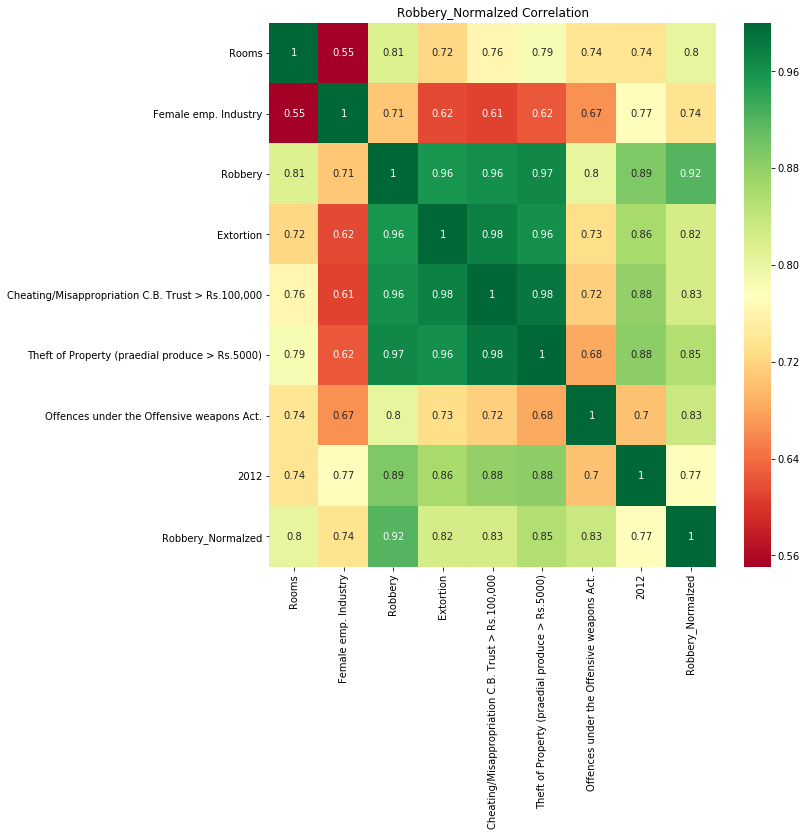

In [38]:
allCorrelations = integrated_data.corr(method='pearson')

## Extract high correlations to Drugs
topCorrFeatures = allCorrelations.index[abs(allCorrelations['Robbery_Normalzed']) >= 0.72]
plt.figure(figsize=(10,10))
ax = sns.heatmap(integrated_data[topCorrFeatures].corr(), annot=True, cmap="RdYlGn")
ax.set_title('Robbery_Normalzed Correlation')

**Tourism (Total room count) has 0.8 correlation to Robberies**

**Female employment indistry has 0.74 correlation to Robberies**

**Draw linear relationship**

C:\Users\Prageeth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


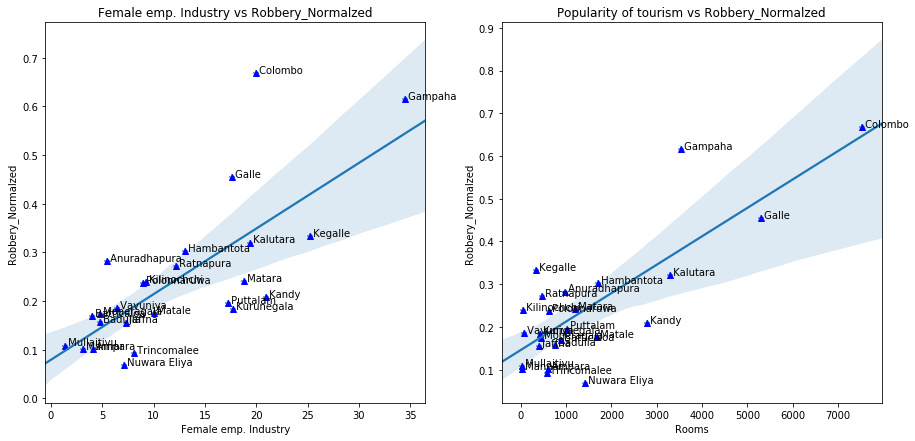

In [39]:
def plotScatterForCrime (column, tag, subPlotIndex):
    plt.subplot(1,2,subPlotIndex)
    plt.plot(integrated_data[column],  integrated_data['Robbery_Normalzed'], 'b^')

    for i, txt in enumerate(integrated_data['District']):
        if integrated_data[column][i] >= 1:
            plt.annotate(' ' + txt, (integrated_data[column][i], integrated_data['Robbery_Normalzed'][i]))
    
    x, y = pd.Series(integrated_data[column], name="x_var"), pd.Series(integrated_data['Robbery_Normalzed'], name="y_var")
    ax = sns.regplot(x=x, y=y, marker="+")
    
    plt.title(tag + ' vs Robbery_Normalzed')
    plt.xlabel(column)
    plt.ylabel('Robbery_Normalzed')

plt.figure(figsize=(15, 7))
plt.subplots_adjust(hspace=0.2)

plotScatterForCrime('Female emp. Industry', 'Female emp. Industry', 1)
plotScatterForCrime('Rooms', 'Popularity of tourism', 2)

**Linear regression to predict Robberies crime using Tourim**

In [40]:
integrated_data.dropna(inplace=True)

X = pd.DataFrame(integrated_data[['Rooms']])
y = pd.DataFrame(integrated_data[['Robbery_Normalzed']])

# model = linear_model.LinearRegression()
model = linear_model.Ridge(alpha=0.1, normalize= True)
# model = linear_model.Lasso(alpha=0.1)

scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
np.mean(scores)

0.46885265848012186

C:\Users\Prageeth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Prageeth\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


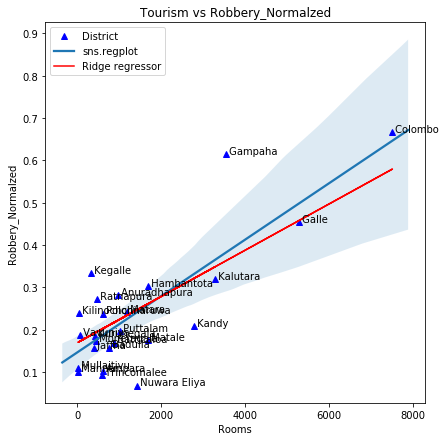

In [41]:
def plotScatterForCrime (column, tag, subPlotIndex):
    plt.subplot(1,2,subPlotIndex)
    plt.plot(integrated_data[column],  integrated_data['Robbery_Normalzed'], 'b^')

    for i, txt in enumerate(integrated_data['District']):
        if integrated_data[column][i] >= 1:
            plt.annotate(' ' + txt, (integrated_data[column][i], integrated_data['Robbery_Normalzed'][i]))
    
    x, y = pd.Series(integrated_data[column], name="x_var"), pd.Series(integrated_data['Robbery_Normalzed'], name="y_var")
    ax = sns.regplot(x=x, y=y, marker=" ")
    
    plt.title(tag + ' vs Robbery_Normalzed')
    plt.xlabel(column)
    plt.ylabel('Robbery_Normalzed')

plt.figure(figsize=(15, 7))
plt.subplots_adjust(hspace=0.2)

plotScatterForCrime('Rooms', 'Tourism', 1)

plt.subplot(1,2,1)
plt.plot(X, model.predict(X),color='r')

plt.legend(['District','sns.regplot', 'Ridge regressor'], loc='upper left')

**Linear regression to predict Robbery crimes using female employment in industrial sector**

In [42]:
integrated_data.dropna(inplace=True)

X = pd.DataFrame(integrated_data[['Female emp. Industry']])
y = pd.DataFrame(integrated_data[['Robbery_Normalzed']])

# model = linear_model.LinearRegression()
model = linear_model.Ridge(alpha=0.1, normalize= True)
# model = linear_model.Lasso(alpha=0.1)

scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
np.mean(scores)

0.19620386179418106

C:\Users\Prageeth\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Prageeth\Anaconda3\lib\site-packages\matplotlib\figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


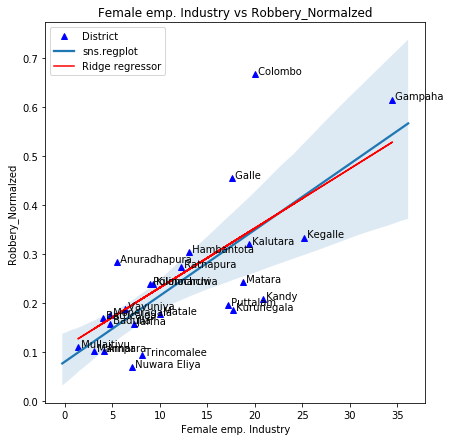

In [43]:
def plotScatterForCrime (column, tag, subPlotIndex):
    plt.subplot(1,2,subPlotIndex)
    plt.plot(integrated_data[column],  integrated_data['Robbery_Normalzed'], 'b^')

    for i, txt in enumerate(integrated_data['District']):
        if integrated_data[column][i] >= 1:
            plt.annotate(' ' + txt, (integrated_data[column][i], integrated_data['Robbery_Normalzed'][i]))
    
    x, y = pd.Series(integrated_data[column], name="x_var"), pd.Series(integrated_data['Robbery_Normalzed'], name="y_var")
    ax = sns.regplot(x=x, y=y, marker=" ")
    
    plt.title(tag + ' vs Robbery_Normalzed')
    plt.xlabel(column)
    plt.ylabel('Robbery_Normalzed')

plt.figure(figsize=(15, 7))
plt.subplots_adjust(hspace=0.2)

plotScatterForCrime('Female emp. Industry', 'Female emp. Industry', 1)

plt.subplot(1,2,1)
plt.plot(X, model.predict(X),color='r')

plt.legend(['District','sns.regplot', 'Ridge regressor'], loc='upper left')

**Using multivariate analysis to predict Robberies using both tourism and female emplotment in industry**

In [44]:
integrated_data.dropna(inplace=True)

X = pd.DataFrame(integrated_data[['Rooms', 'Female emp. Industry']])
y = pd.DataFrame(integrated_data[['Robbery_Normalzed']])

# model = linear_model.LinearRegression()
model = linear_model.Ridge(alpha=0.15, normalize= True)
# model = linear_model.Lasso(alpha=0.1)

scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 score = model.score(X.iloc[test,:], y.iloc[test,:])
 scores.append(score)
np.mean(scores)

0.6039047534398793

**Furthur tuning and feature incorporation should be done to predict Robberies more accurately since 0.604 score is a moderate prediction.**